In [1]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

import kagglehub

b:\Juan Esteban\Documentos\RNA\Web\recomdenderAPI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to C:\Users\Juan
[nltk_data]     Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Juan
[nltk_data]     Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Juan
[nltk_data]     Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Juan
[nltk_data]     Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [66]:
# Download latest version
path = kagglehub.dataset_download("lokeshparab/amazon-products-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Juan Esteban\.cache\kagglehub\datasets\lokeshparab\amazon-products-dataset\versions\2


In [67]:
df=pd.read_csv(path+"/Amazon-Products.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [ ]:
df = df.sample(frac=0., random_state=1)

In [68]:
df.shape

(551585, 9)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   image           551585 non-null  object
 4   link            551585 non-null  object
 5   ratings         375791 non-null  object
 6   no_of_ratings   375791 non-null  object
 7   discount_price  490422 non-null  object
 8   actual_price    533772 non-null  object
dtypes: object(9)
memory usage: 37.9+ MB


In [70]:
df['main_category'].value_counts()

main_category
accessories                116141
men's clothing              76656
women's clothing            76512
tv, audio & cameras         68659
men's shoes                 57456
appliances                  33096
stores                      32903
home & kitchen              14568
kids' fashion               13488
sports & fitness            12648
bags & luggage              10416
beauty & health             10122
car & motorbike              7080
toys & baby products         6216
women's shoes                5472
industrial supplies          4104
grocery & gourmet foods      3312
pet supplies                 1632
music                        1080
home, kitchen, pets            24
Name: count, dtype: int64

In [71]:
df['name'].unique()
df['name'].duplicated().sum()

np.int64(155375)

In [72]:
duplicate_names = df[df['name'].duplicated(keep=False)]
duplicate_names.head(100)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...
96,Daikin 1.5 Ton 5 Star Inverter Split AC (Coppe...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/418VQew9c-...,https://www.amazon.in/Daikin-Inverter-Copper-F...,4.3,12,"₹48,567","₹73,800"
97,Panasonic 1.5 Ton 3 Star Hot and Cold Wi-Fi In...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/71z2BRd3jb...,https://www.amazon.in/Panasonic-Convertible-ad...,5.0,2,"₹43,990","₹61,400"
98,"Whirlpool 1.5 Ton 4 Star, Flexicool Inverter S...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51xzmzjFS7...,https://www.amazon.in/Whirlpool-Flexicool-Inve...,NaN,NaN,"₹36,490","₹66,900"
99,"Voltas 1.5 Ton 3 Star, Inverter Split AC(Coppe...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/41ACywlcM1...,https://www.amazon.in/Voltas-Adjustable-183V-V...,3.3,3,"₹33,678","₹68,990"


In [73]:
duplicate_names_sorted = duplicate_names.sort_values(by='name')
duplicate_names_sorted.head(50)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
347148,""" SF-400A"" ,10kg x 1gm kitchen weighing scale ...",appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/31So5vgWk-...,https://www.amazon.in/SF-400A-weighing-Electro...,NaN,NaN,₹415,₹899
10092,""" SF-400A"" ,10kg x 1gm kitchen weighing scale ...",appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SF-400A-weighing-Electro...,NaN,NaN,₹415,₹899
244112,"""A"" PLUS Hygiene Portable Room Air Purifier an...",appliances,Heating & Cooling Appliances,https://m.media-amazon.com/images/I/61HihavsUS...,https://www.amazon.in/Hygiene-Portable-Humidif...,4.1,911,"₹1,499","₹2,678"
341117,"""A"" PLUS Hygiene Portable Room Air Purifier an...",appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/61HihavsUS...,https://www.amazon.in/Hygiene-Portable-Humidif...,4.1,911,"₹1,499","₹2,678"
2342,"""A"" PLUS Hygiene Portable Room Air Purifier an...",appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Hygiene-Portable-Humidif...,4.1,911,"₹1,499","₹2,678"
38402,"""INTERN SOPRANO 21"" UKULELE WITH BAG (BLACK)",accessories,Bags & Luggage,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Intern-INT-UK21LD-BK-Con...,3.9,523,"₹1,690","₹2,995"
214330,"""INTERN SOPRANO 21"" UKULELE WITH BAG (BLACK)",accessories,Handbags & Clutches,https://m.media-amazon.com/images/I/413gQVbxZl...,https://www.amazon.in/Intern-INT-UK21LD-BK-Con...,3.9,523,"₹1,690","₹2,995"
117541,"""PH"" POSHAKHUB Women Georgette Hand Embroidery...",women's clothing,Clothing,https://m.media-amazon.com/images/I/61yFCDHRxg...,https://www.amazon.in/PH-POSHAKHUB-Georgette-E...,4.1,26,₹989.10,"₹1,666"
135561,"""PH"" POSHAKHUB Women Georgette Hand Embroidery...",women's clothing,Ethnic Wear,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/PH-POSHAKHUB-Georgette-E...,4.1,26,₹989.10,"₹1,666"
117071,"""PH"" POSHAKHUB Women's Black Amerian Crepe Foi...",women's clothing,Clothing,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/PH-POSHAKHUB-Printed-Jum...,4.2,57,₹809.10,"₹1,304"


In [74]:
df.drop_duplicates(subset='name',inplace=True)

In [75]:
df.shape

(396210, 9)

In [76]:
# Cargar stopwords en inglés (puedes cambiarlo al idioma deseado)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_product_names(name):
    if isinstance(name, str):  # Asegurar que es una cadena de texto
        # 1. Eliminar caracteres especiales
        name = re.sub(r'[^a-zA-Z0-9\s]', '', name)
        # 2. Convertir a minúsculas
        name = name.lower()
        # 3. Tokenización (convertir a lista de palabras)
        tokens = word_tokenize(name)
        # 4. Eliminar stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # 5. Lematización (útil para mejorar la semántica)
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # 6. Volver a unir el texto limpio
        name = ' '.join(tokens)
    return name

# Aplicar limpieza
df['name'] = df['name'].apply(clean_product_names)

print(df)


                                                     name     main_category  \
0       lloyd 15 ton 3 star inverter split ac 5 1 conv...        appliances   
1       lg 15 ton 5 star ai dual inverter split ac cop...        appliances   
2       lg 1 ton 4 star ai dual inverter split ac copp...        appliances   
3       lg 15 ton 3 star ai dual inverter split ac cop...        appliances   
4       carrier 15 ton 3 star inverter split ac copper...        appliances   
...                                                   ...               ...   
551579  savage pink purple hoodie suitable summer wint...  sports & fitness   
551580                   adidas regular fit men track top  sports & fitness   
551581              redwolf noice toit smort hoodie black  sports & fitness   
551582           redwolf schrute farm bb hoodie navy blue  sports & fitness   
551584  mothercare printed cotton elastane girl infant...  sports & fitness   

            sub_category                           

In [ ]:
df['name'].unique()

array(['artis bt15 bluetooth portable speaker mobile holderusbfmtf card reader hand free calling 10w rms output',
       'kleio womens girl pu leather multipurpose zip wallet card holder purse clutchho5003kldg',
       'freshfoot cute colourful new born baby sock set 0 12 month combo set3 pair sock 3 pair headcaps 3 pair h',
       ...,
       'suhanipari unisex garden clog shoe slipper sandal light weight extra comfor',
       'krimo jalebi gol jewellery chain accessory antique fashion jewellery menchjalebi golbl110012',
       'sir corbett men brown synthetic jogging shoesbig'], dtype=object)

In [77]:
import pandas as pd
import re

def clean_category(category):
    if isinstance(category, str):  # Asegurar que es una cadena de texto
        # Convertir a minúsculas y eliminar caracteres especiales
        category = category.lower().strip()
        category = re.sub(r'[^a-z\s]', '', category)  # Solo letras y espacios
    return category

# Aplicar limpieza
df['main_category'] = df['main_category'].apply(clean_category)

# Ver categorías resultantes
print(df['main_category'].unique())


['appliances' 'car  motorbike' 'tv audio  cameras' 'sports  fitness'
 'grocery  gourmet foods' 'home  kitchen' 'pet supplies' 'stores'
 'toys  baby products' 'kids fashion' 'bags  luggage' 'accessories'
 'womens shoes' 'beauty  health' 'mens shoes' 'womens clothing'
 'industrial supplies' 'mens clothing' 'music' 'home kitchen pets']


In [21]:
df['main_category'].unique()

array(['tv audio  cameras', 'accessories', 'kids fashion', 'mens shoes',
       'mens clothing', 'car  motorbike', 'stores', 'womens clothing',
       'appliances', 'bags  luggage', 'home  kitchen',
       'industrial supplies', 'sports  fitness', 'grocery  gourmet foods',
       'beauty  health', 'toys  baby products', 'womens shoes',
       'pet supplies', 'music', 'home kitchen pets'], dtype=object)

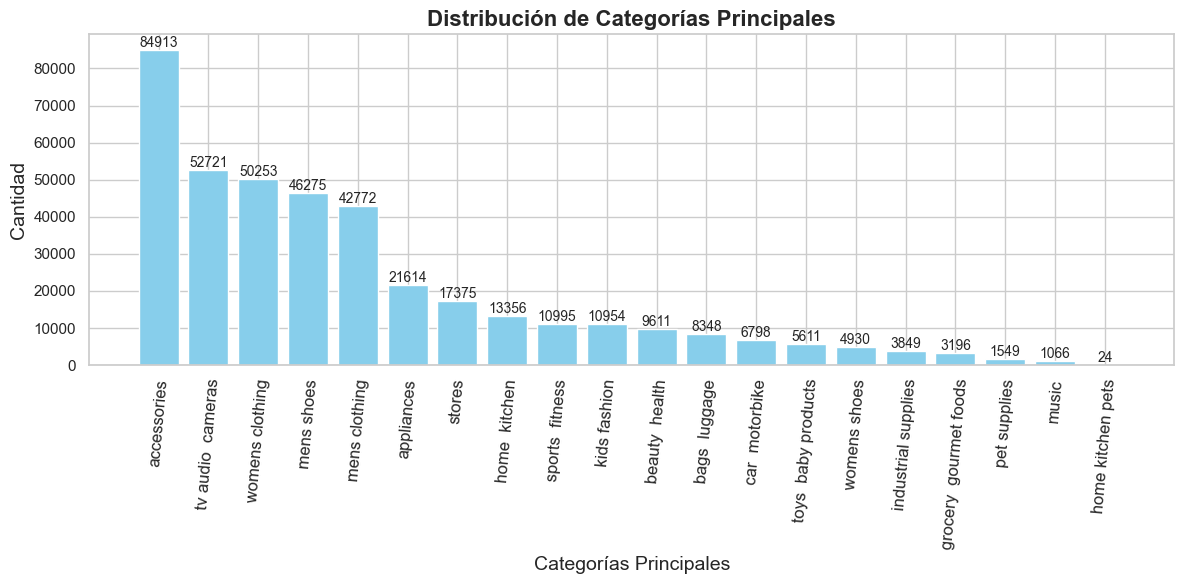

In [78]:
import matplotlib.pyplot as plt
main_category = df['main_category'].value_counts()
maincat_counts = main_category.values

main_category = df['main_category'].value_counts()

maincat_counts = main_category.values


# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
bars = plt.bar(main_category.index, maincat_counts, color='skyblue')

# Añadir título y etiquetas en español
plt.title('Distribución de Categorías Principales', fontsize=16, fontweight='bold')
plt.xlabel('Categorías Principales', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=85, fontsize=12)

# Añadir etiquetas con los valores en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [79]:
# Function to clean and standardize sub_category
def clean_sub_category(category):
    category = category.lower().strip()
    category = category.replace('&', 'and')
    category = category.replace(',', '')
    category = category.replace("'", "")
    category = category.replace('-','')
    return category.title()
df['sub_category'] = df['sub_category'].apply(clean_sub_category)

In [ ]:
df['sub_category'].unique()

array(['Speakers', 'Handbags And Clutches', 'Baby Fashion',
       'Home Entertainment Systems', 'Gold And Diamond Jewellery',
       'Sports Shoes', 'Fashion And Silver Jewellery', 'Innerwear',
       'Kids Fashion', 'Tshirts And Polos', 'Car Parts', 'Womens Fashion',
       'Watches', 'Ethnic Wear', 'Shirts', 'Jeans', 'Televisions',
       'Bags And Luggage', 'Mens Fashion', 'Kids Watches', 'Western Wear',
       'Jewellery', 'Security Cameras', 'Clothing',
       'Kitchen And Home Appliances', 'Wallets', 'Home Furnishing',
       'Lingerie And Nightwear', 'Heating And Cooling Appliances',
       'Sewing And Craft Supplies', 'Car Accessories', 'Sportswear',
       'Lab And Scientific', 'Badminton', 'Snack Foods', 'School Bags',
       'Backpacks', 'Travel Accessories', 'Camera Accessories',
       'Refrigerators', 'Casual Shoes', 'All Electronics', 'Cricket',
       'Formal Shoes', 'Kids Clothing', 'Football', 'All Appliances',
       'Garden And Outdoors', 'Furniture', 'Rucksacks',


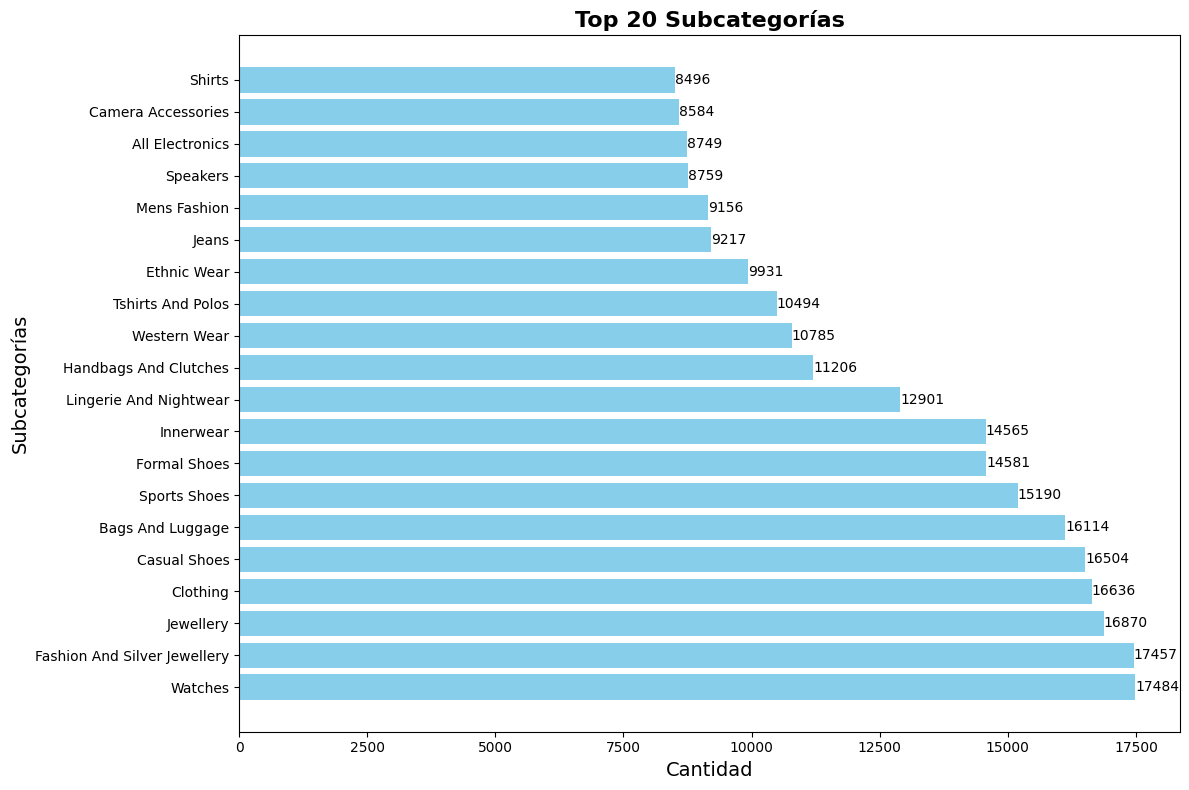

In [14]:
# Contar las subcategorías y obtener las 20 más frecuentes
subcat_counts = df['sub_category'].value_counts()
top_20_subcats = subcat_counts.nlargest(20)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
bars = plt.barh(top_20_subcats.index, top_20_subcats, color='skyBlue')

# Añadir título y etiquetas en español
plt.title('Top 20 Subcategorías', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Subcategorías', fontsize=14)

# Añadir etiquetas con los valores en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}',
             ha='left', va='center', fontsize=10)

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
df['ratings'].unique()

array(['5.0', '4.2', '3.8', '4.5', nan, '2.7', '3.7', '4.0', '4.6', '3.0',
       '3.6', '3.9', '3.5', '4.4', '2.9', '3.3', '3.2', '2.6', '4.1',
       '3.4', '3.1', '4.3', '2.8', '2.0', '4.7', '1.0', 'FREE', '4.8',
       '2.3', 'Get', '2.5', '2.4', '4.9', '1.5', '1.4', '2.1', '1.3',
       '1.9', '2.2', '1.8', '1.6', '1.7', '₹99', '₹70', '1.2'],
      dtype=object)

In [80]:
def clean_ratings(df, column_name="ratings"):

    # Valores no numéricos que deben convertirse en 0.0
    invalid_values = ['Get', 'FREE', '₹68.99', '₹65', '₹70', '₹100', '₹99', '₹2.99']

    # Reemplazar valores no numéricos con 0.0
    df[column_name] = df[column_name].replace(invalid_values, 0.0)

    # Convertir la columna a tipo float, manejando errores silenciosamente
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Formatear para mantener 1 decimal (ej. 4.2 en vez de 4.200000)
    df[column_name] = df[column_name].apply(lambda x: f"{int(x)}.{int((x - int(x)) * 10)}" if pd.notnull(x) else "0.0")

    return df[column_name]

df['ratings'] = clean_ratings(df)

# Ver resultados
print(df['ratings'].unique())  # Valores únicos después de la limpieza
print(df['ratings'].isnull().sum())  # Contar valores nulos


['4.2' '4.0' '3.9' '3.7' '3.5' '0.0' '4.5' '3.2' '3.3' '2.9' '5.0' '4.4'
 '3.6' '2.7' '3.0' '3.1' '4.7' '2.5' '1.0' '2.6' '2.2' '1.7' '1.8' '2.3'
 '4.9' '1.6' '1.9' '2.0' '1.3' '2.1' '1.1' '1.5']
0


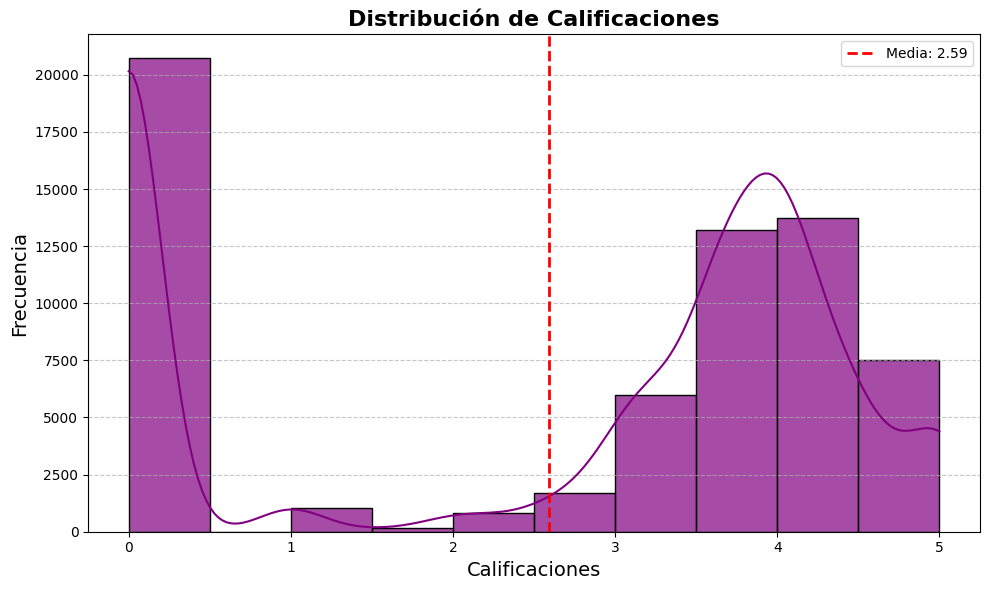

In [ ]:
import seaborn as sns

# Convertir las calificaciones a numéricas
df['ratings'] = pd.to_numeric(df['ratings'])

# Crear el gráfico de distribución
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=10, kde=True, color='purple', alpha=0.7, edgecolor='black')

# Añadir título y etiquetas en español
plt.title('Distribución de Calificaciones', fontsize=16, fontweight='bold')
plt.xlabel('Calificaciones', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Añadir una cuadrícula para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una línea vertical para marcar la media
mean_rating = df['ratings'].mean()
plt.axvline(mean_rating, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_rating:.2f}')

# Mostrar la leyenda
plt.legend()

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [81]:
import pandas as pd

def clean_no_of_ratings(df, column_name="no_of_ratings"):
    # Eliminar comas en los números
    df[column_name] = df[column_name].astype(str).str.replace(',', '', regex=False)

    # Convertir a número (maneja errores silenciosamente)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Reemplazar valores nulos con 0
    df[column_name] = df[column_name].fillna(0).astype(int)

    return df[column_name]

# Aplicar la función
df['no_of_ratings'] = clean_no_of_ratings(df)

# Ver resultados
print(df['no_of_ratings'])
print(df['no_of_ratings'].isnull().sum())

0         2255
1         2948
2         1206
3           69
4          630
          ... 
551579       6
551580       9
551581       2
551582       1
551584       5
Name: no_of_ratings, Length: 396210, dtype: int64
0


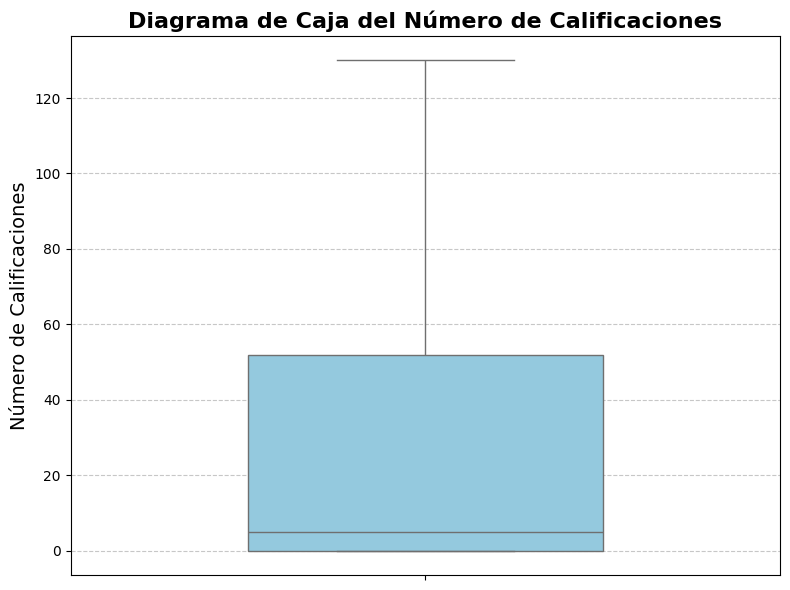

In [ ]:
# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df['no_of_ratings'].quantile(0.25)
Q3 = df['no_of_ratings'].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartílico

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Recortar los valores atípicos
df['no_of_ratings'] = df['no_of_ratings'].clip(lower_bound, upper_bound)

# Crear el gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['no_of_ratings'], color='skyblue', width=0.5)

# Añadir título y etiquetas en español
plt.title('Diagrama de Caja del Número de Calificaciones', fontsize=16, fontweight='bold')
plt.ylabel('Número de Calificaciones', fontsize=14)

# Añadir una cuadrícula horizontal para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<ipython-input-29-06b32d6bc2b0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis', alpha=0.8)


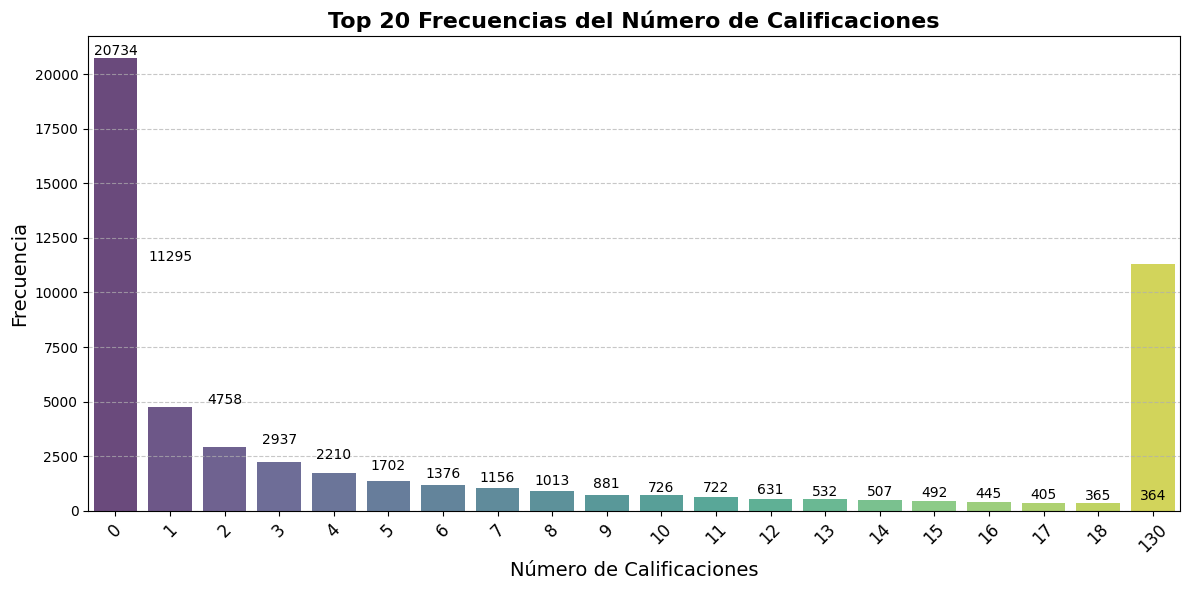

In [ ]:

# Obtener las 20 frecuencias más altas del número de calificaciones
rating_counts = df['no_of_ratings'].value_counts().nlargest(20)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis', alpha=0.8)

# Añadir título y etiquetas en español
plt.title('Top 20 Frecuencias del Número de Calificaciones', fontsize=16, fontweight='bold')
plt.xlabel('Número de Calificaciones', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, fontsize=12)

# Añadir etiquetas con los valores en cada barra
for index, value in enumerate(rating_counts.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=10)

# Añadir una cuadrícula para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [82]:
def clean_price_column(df, column_name):
    df[column_name] = df[column_name].astype(str).str.split(" ", expand=True).get(0)  # Extraer primer fragmento
    df[column_name] = df[column_name].str.replace("₹", "", regex=False)  # Quitar símbolo de rupia
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')  # Convertir a float (maneja errores)
    df[column_name] = df[column_name].fillna(0.0)

    return df[column_name]

df['discount_price'] = clean_price_column(df, 'discount_price')
df['actual_price'] = clean_price_column(df, 'actual_price')

# Ver resultados
print(df)


                                                     name    main_category  \
0       lloyd 15 ton 3 star inverter split ac 5 1 conv...       appliances   
1       lg 15 ton 5 star ai dual inverter split ac cop...       appliances   
2       lg 1 ton 4 star ai dual inverter split ac copp...       appliances   
3       lg 15 ton 3 star ai dual inverter split ac cop...       appliances   
4       carrier 15 ton 3 star inverter split ac copper...       appliances   
...                                                   ...              ...   
551579  savage pink purple hoodie suitable summer wint...  sports  fitness   
551580                   adidas regular fit men track top  sports  fitness   
551581              redwolf noice toit smort hoodie black  sports  fitness   
551582           redwolf schrute farm bb hoodie navy blue  sports  fitness   
551584  mothercare printed cotton elastane girl infant...  sports  fitness   

            sub_category                                       

In [83]:
df.isnull().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [84]:
df['ratings'] = df['ratings'].astype(float)
df['no_of_ratings'] = df['no_of_ratings'].astype(str).str.replace(',', '', regex=True)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')

In [85]:
from sklearn.preprocessing import LabelEncoder
# Ejemplo de limpieza de precios si contienen símbolos (como "₹" y comas)
df['discount_price'] = df['discount_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Encoder para el nombre del producto
name_enc = LabelEncoder()
df['name_encoded'] = name_enc.fit_transform(df['name'])

# Encoder para main_category
main_category_enc = LabelEncoder()
df['main_category_encoded'] = main_category_enc.fit_transform(df['main_category'])

# Encoder para sub_category
sub_category_enc = LabelEncoder()
df['sub_category_encoded'] = sub_category_enc.fit_transform(df['sub_category'])

# Convertir ratings y no_of_ratings a float (si es que hay NaN, considerar imputarlos o eliminarlos)
df['ratings'] = df['ratings'].astype(float)
df['no_of_ratings'] = df['no_of_ratings'].astype(float)

# Normalización de valores entre 0 y 1
df['discount_price'] = df['discount_price'] / df['discount_price'].max()
df['actual_price'] = df['actual_price'] / df['actual_price'].max()
df['ratings'] = df['ratings'] / 5.0  # Suponiendo que el rating máximo es 5
df['no_of_ratings'] = df['no_of_ratings'] / df['no_of_ratings'].max()


In [86]:
df.drop(columns=['image', 'link'], inplace=True)

In [87]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,name_encoded,main_category_encoded,sub_category_encoded
0,lloyd 15 ton 3 star inverter split ac 5 1 conv...,appliances,Air Conditioners,0.84,0.003825,0.0,0.0,195088,1,0
1,lg 15 ton 5 star ai dual inverter split ac cop...,appliances,Air Conditioners,0.84,0.005000,0.0,0.0,190956,1,0
2,lg 1 ton 4 star ai dual inverter split ac copp...,appliances,Air Conditioners,0.84,0.002046,0.0,0.0,190880,1,0
3,lg 15 ton 3 star ai dual inverter split ac cop...,appliances,Air Conditioners,0.80,0.000117,0.0,0.0,190933,1,0
4,carrier 15 ton 3 star inverter split ac copper...,appliances,Air Conditioners,0.80,0.001069,0.0,0.0,67462,1,0


In [88]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Embedding, Dense, Dropout, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

class RatingPredictor:
    def __init__(self, data, embedding_dims=None):
        self.df = data
        self.embedding_dims = embedding_dims or {
            'product': 64,
            'category': 16
        }
        
        # Preparar datos
        self._prepare_data()
        self._build_model()
    
    def _prepare_data(self):
        """Divide y prepara los conjuntos de datos"""
        self.train_set, self.test_set = train_test_split(
            self.df, 
            test_size=0.2,
            random_state=42
        )
        
        # Mapeos de cardinalidad
        self.cardinalities = {
            'product': self.df['name_encoded'].nunique(),
            'main_category': self.df['main_category_encoded'].nunique(),
            'sub_category': self.df['sub_category_encoded'].nunique()
        }
    
    def _create_embedding_branch(self, input_name, cardinality):
        """Crea una rama de embedding para características categóricas"""
        inp = Input(shape=(1,), name=f"{input_name}_in")
        embed = Embedding(
            input_dim=cardinality,
            output_dim=self.embedding_dims['category' if 'category' in input_name else 'product'],
            name=f"{input_name}_embed"
        )(inp)
        return inp, Flatten()(embed)
    
    def _build_model(self):
        """Construye la arquitectura del modelo"""
        # Entradas categóricas
        product_in, product_vec = self._create_embedding_branch('product', self.cardinalities['product'])
        main_cat_in, main_cat_vec = self._create_embedding_branch('main_category', self.cardinalities['main_category'])
        sub_cat_in, sub_cat_vec = self._create_embedding_branch('sub_category', self.cardinalities['sub_category'])
        
        # Entradas numéricas
        numeric_in = Input(shape=(3,), name="numeric_features")
        
        # Fusión de características
        merged = Concatenate()([
            product_vec, 
            main_cat_vec, 
            sub_cat_vec, 
            numeric_in
        ])
        
        # Capas de procesamiento
        x = Dense(64, activation='relu')(merged) 
        x = Dropout(0.15)(x)
        x = Dense(32, activation='relu')(x) 
        x = Dropout(0.15)(x)
        
        # Capa de salida
        output = Dense(1, activation='linear')(x)
        
        # Ensamblar modelo
        self.model = Model(
            inputs=[product_in, main_cat_in, sub_cat_in, numeric_in],
            outputs=output
        )
        
        self.model.compile(
            optimizer=Adam(),
            loss='mse',
            metrics=['mae', 'mse']
        )
    
    def train(self, epochs=20, batch_size=32):
        """Entrena el modelo"""
        # Extraer características de entrenamiento
        features = {
            'product': self.train_set['name_encoded'].values,
            'main_category': self.train_set['main_category_encoded'].values,
            'sub_category': self.train_set['sub_category_encoded'].values,
            'numeric': self.train_set[['discount_price', 'actual_price', 'no_of_ratings']].values
        }
        
        targets = self.train_set['ratings'].values
        
        return self.model.fit(
            x=[features[k] for k in ['product', 'main_category', 'sub_category', 'numeric']],
            y=targets,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.1,
            verbose=1
        )
    

# Uso del modelo
if __name__ == "__main__":
    # Cargar datos aquí (df = ...)
    
    # Instanciar predictor
    predictor = RatingPredictor(df)
    
    # Entrenar modelo
    training_history = predictor.train(epochs=20, batch_size=256)

Epoch 1/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 158s 140ms/step - loss: 0.1338 - mae: 0.3080 - mse: 0.1338 - val_loss: 0.1106 - val_mae: 0.2748 - val_mse: 0.1106
Epoch 2/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 156s 140ms/step - loss: 0.0652 - mae: 0.1955 - mse: 0.0652 - val_loss: 0.1356 - val_mae: 0.2964 - val_mse: 0.1356
Epoch 3/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 156s 139ms/step - loss: 0.0336 - mae: 0.1322 - mse: 0.0336 - val_loss: 0.1207 - val_mae: 0.2578 - val_mse: 0.1207
Epoch 4/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 156s 140ms/step - loss: 0.0125 - mae: 0.0792 - mse: 0.0125 - val_loss: 0.1181 - val_mae: 0.2684 - val_mse: 0.1181
Epoch 5/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 156s 140ms/step - loss: 0.0078 - mae: 0.0643 - mse: 0.0078 - val_loss: 0.1197 - val_mae: 0.2622 - val_mse: 0.1197
Epoch 6/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 157s 141ms/step - loss: 0.0066 - mae: 0.0592 - mse: 0.0066 - val_loss: 0.1206 - val_mae: 0.2647 - val_mse: 0.1206
Epoch 7/20
1115/1115 ━━━━━━━━━━━━━━━━━━━━ 156s 140ms/step - loss

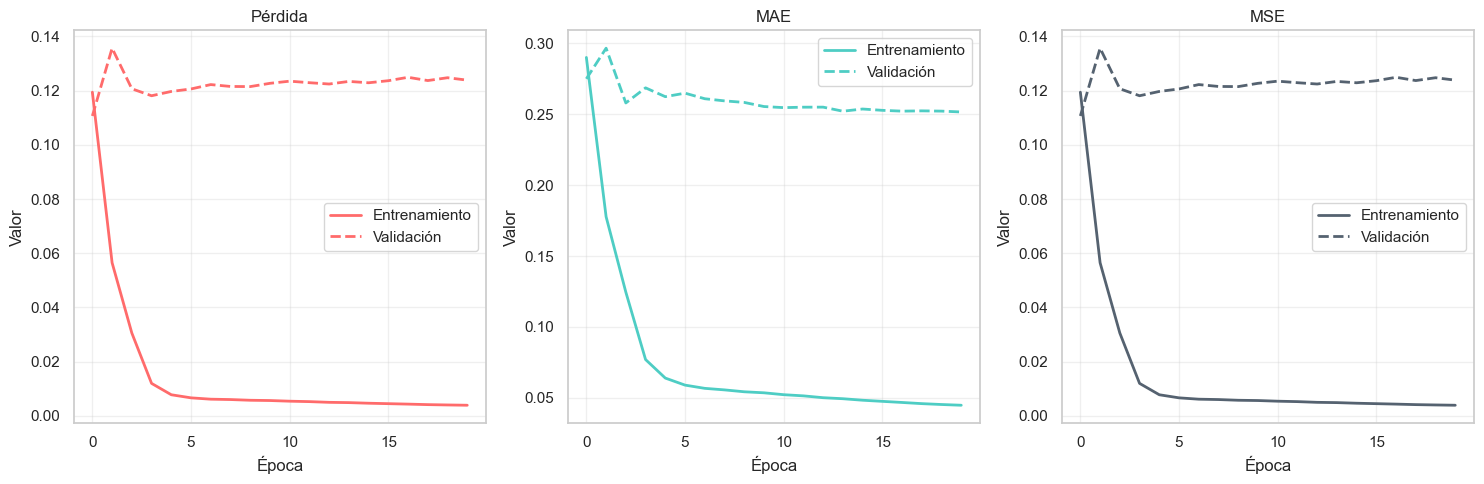

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_training_history(history, metrics=['loss', 'mae', 'mse']):
    """Visualiza las métricas de entrenamiento y validación"""
    plt.figure(figsize=(15, 5))
    sns.set(style="whitegrid")
    
    # Configurar colores y estilos
    colors = ['#FF6B6B', '#4ECDC4', '#556270']
    val_prefix = 'val_'
    
    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i+1)
        
        # Curva de entrenamiento
        plt.plot(history.history[metric], 
                color=colors[i], 
                linewidth=2, 
                label='Entrenamiento')
        
        # Curva de validación
        if f'{val_prefix}{metric}' in history.history:
            plt.plot(history.history[f'{val_prefix}{metric}'], 
                    color=colors[i], 
                    linestyle='--',
                    linewidth=2,
                    label='Validación')
        
        plt.title(f'{"MAE" if metric == "mae" else "MSE" if metric == "mse" else "Pérdida"}')
        plt.xlabel('Época')
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
    plt.tight_layout()
    plt.savefig('training_metrics.png', dpi=300)
    plt.show()

# Ejemplo de uso con datos simulados (usar history real de model.fit())


plot_training_history( training_history, metrics=['loss', 'mae', 'mse'])

In [90]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from typing import Dict, List, Union

class SistemaRecomendacion:
    def __init__(self, modelo, dataframe):
        """
        Sistema de recomendación basado en embeddings y similitud coseno
        
        Args:
            modelo (keras.Model): Modelo entrenado con capas de embedding
            dataframe (pd.DataFrame): DataFrame con los datos de productos
        """
        self.modelo = modelo
        self.df = dataframe
        self.mapa_nombres = self._crear_mapa_nombres()
        self.embeddings = self._cargar_embeddings()
        self.metadatos = self._preprocesar_metadatos()
        self.vectores_combinados = self._precalcular_vectores()

    def _crear_mapa_nombres(self) -> Dict[int, str]:
        """Crea diccionario de mapeo ID -> Nombre de producto"""
        return self.df.set_index('name_encoded')['name'].astype(str).to_dict()

    def _cargar_embeddings(self) -> Dict[str, np.ndarray]:
        """Extrae y verifica los embeddings del modelo"""
        try:
            return {
                'producto': self.modelo.get_layer("product_embed").get_weights()[0],
                'categoria_principal': self.modelo.get_layer("main_category_embed").get_weights()[0],
                'subcategoria': self.modelo.get_layer("sub_category_embed").get_weights()[0]
            }
        except ValueError as e:
            raise RuntimeError("El modelo no contiene las capas de embedding requeridas") from e

    def _preprocesar_metadatos(self) -> Dict[int, Dict[str, int]]:
        """Preprocesa todos los metadatos para acceso rápido"""
        return {
            row['name_encoded']: {
                'categoria_principal': row['main_category_encoded'],
                'subcategoria': row['sub_category_encoded']
            }
            for _, row in self.df.iterrows()
        }

    def _precalcular_vectores(self) -> np.ndarray:
        """Calcula eficientemente todos los vectores combinados"""
        # Obtener todos los IDs únicos y ordenados
        ids_productos = sorted(self.metadatos.keys())
        
        # Obtener índices para cada categoría
        main_cat_indices = [self.metadatos[pid]['categoria_principal'] for pid in ids_productos]
        sub_cat_indices = [self.metadatos[pid]['subcategoria'] for pid in ids_productos]
        
        # Crear matriz combinada usando numpy avanzado
        return np.hstack([
            self.embeddings['producto'][ids_productos],
            self.embeddings['categoria_principal'][main_cat_indices],
            self.embeddings['subcategoria'][sub_cat_indices]
        ])

    def _obtener_indice(self, producto_id: int) -> int:
        """Obtiene el índice correspondiente al ID del producto"""
        try:
            return list(self.metadatos.keys()).index(producto_id)
        except ValueError:
            raise KeyError(f"Producto ID {producto_id} no encontrado")

    def generar_recomendaciones(self, producto_id: int, top_n: int = 5) -> List[str]:
        """
        Genera recomendaciones basadas en similitud combinada
        
        Args:
            producto_id (int): ID del producto de referencia
            top_n (int): Número de recomendaciones a devolver
            
        Returns:
            List[str]: Lista de nombres de productos recomendados
        """
        idx = self._obtener_indice(producto_id)
        similitudes = cosine_similarity(
            [self.vectores_combinados[idx]],
            self.vectores_combinados
        )[0]
        
        # Ordenar y excluir el producto original
        indices = np.argsort(-similitudes)[1:top_n+1]
        return [self.mapa_nombres[self.df.iloc[i]['name_encoded']] for i in indices]

    def mostrar_recomendaciones(self, producto_id: int, top_n: int = 5):
        """Muestra las recomendaciones formateadas"""
        try:
            nombre = self.mapa_nombres[producto_id]
            recomendados = self.generar_recomendaciones(producto_id, top_n)
            
            print(f"\n🔍 Recomendaciones para: {nombre}")
            for i, prod in enumerate(recomendados, 1):
                print(f"{i}. {prod}")
                
        except KeyError:
            print(f"⚠️ Error: Producto con ID {producto_id} no existe")


In [95]:
modelo = predictor.model
data = predictor.df
recomendador = SistemaRecomendacion(modelo, data)
recomendador.mostrar_recomendaciones(600)


🔍 Recomendaciones para: 12 volt battery charger carbike 75 amp heavy duity cooling inside battery charger
1. inc5 womens 100949chikoo flat sandal
2. lee cooper men lc2024b1r sneaker
3. chirag distribution ro food grade 10 mtrs pipe tube 14 type water purifierblue
4. tistabene grey denim washed men jean mjs0081
5. swiss track stt02 watch girlswomen


In [96]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
from typing import Dict, List, Tuple

# Funciones de persistencia
def guardar_modelo(modelo: tf.keras.Model, ruta: str = 'modelo_recomendacion.keras') -> None:
    """Guarda el modelo entrenado en formato Keras"""
    modelo.save(ruta)

def cargar_modelo(ruta: str = 'modelo_recomendacion.keras') -> tf.keras.Model:
    """Carga el modelo desde disco"""
    return tf.keras.models.load_model(ruta)

def guardar_datos(df: pd.DataFrame, ruta: str = 'datos_productos.csv') -> None:
    """Guarda los datos esenciales para recomendaciones"""
    df[['name_encoded', 'name', 'main_category_encoded', 'sub_category_encoded']].to_csv(ruta)

def cargar_datos(ruta: str = 'datos_productos.csv') -> pd.DataFrame:
    """Carga los datos desde disco"""
    return pd.read_csv(ruta, index_col=0)

    
guardar_modelo(predictor.model)
guardar_datos(df)
    